# Data Analysis and Visualization Assignment-1

## Team Memebers (NAME + ROLL)
-   Chirag - 12140520
-   Anant Yadav -12140190

# Data Scraping + EDA + Clustering

In [3]:
%pip install beautifulsoup4 selenium webdriver_manager tqdm

Note: you may need to restart the kernel to use updated packages.


## Import Libraries

In [2]:
import time
import os
import re
from bs4 import BeautifulSoup
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from tqdm import tqdm
import lxml

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)  
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

## WebDriver Creation

In [3]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

In [4]:
# Driver creation
chrome_options = Options() # Initializing am options object 

#chrome_options.add_argument("--headless") # Ensure GUI is off
chrome_options.add_argument("--no-sandbox")
#chrome_options.add_argument("--incognito")
#chrome_options.binary_location = "/sbin/brave" # optional, if you don't have chrome

# Silent download of drivers
os.environ['WDM_LOG'] = 'False'

# Create service
webdriver_service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service = webdriver_service, options = chrome_options)

## Data Scraping
Scrape the job-postings for the following roles in India:
- Data Engineer
- Data Analyst
- Data Scientist
- Machine Learning Engineer

**Instructions**
- Scrape 300 Job postings per role
- For each job posting, extract the following information:
     - job_title
     - job_role (one of the above 4)
     - company
     - job_location
     - job_summary
     - post_date (posted how many days ago)
     - today (date)
     - job_salary(if not present, fill it with NaN)
     - Job_url
- Create a dataframe from this information

In [5]:
from selenium.webdriver.support.ui import WebDriverWait
from datetime import datetime

In [6]:
Total_jobs=[]
roles = ['Data Engineer', 'Data Analyst', 'Data Scientist', 'Machine Learning Engineer']
# Scrape 300 Job postings per role

for role in roles:
    print(f"Companies offering jobs for {role} role:-")
    cnt=0
    for i in range(30):
        cnt+=1
        print(cnt)
        link = f"https://in.indeed.com/jobs?q={role.replace(' ', '+')}&l=India&start={10*i}"
        driver.get(link)
        page_source = driver.page_source
        # Parse 1-page
        soup = BeautifulSoup(page_source, 'lxml')
        all_jobs = soup.find_all('div', attrs = {'class':'job_seen_beacon'})
        for jobs in all_jobs:
            dict_job={}
            try:
                dict_job['title']=jobs.find('h2', attrs = {'class' : 'jobTitle css-1h4a4n5 eu4oa1w0'}).text
                dict_job['job_role']=role
                dict_job['companyName']=jobs.find('span', attrs = {'class' : 'companyName'}).text
                dict_job['job_location']=jobs.find('div', attrs = {'class' : 'companyLocation'}).text
                dict_job['Job_Summary']=jobs.find('div',attrs={'class':'job-snippet'}).text.strip()
                dict_job['post_date']=jobs.find('span',attrs={'class':'date'}).text
                salary=jobs.find('div', attrs = {'class' : 'metadata salary-snippet-container'})
                if salary:
                    dict_job['salary']=salary.text
                else:
                    dict_job['salary']=float("NaN")

                dict_job['today_date']=datetime.today().strftime('%Y-%m-%d')

                dict_job['Job_url']=jobs.find('a',attrs={'class' : 'jcs-JobTitle css-jspxzf eu4oa1w0'})['href']
            except Exception as e:
                Errors=e

            Total_jobs.append(dict_job)
        time.sleep(3)

Companies offering jobs for Data Engineer role:-
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
Companies offering jobs for Data Analyst role:-
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
Companies offering jobs for Data Scientist role:-
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
Companies offering jobs for Machine Learning Engineer role:-
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


In [8]:
Total_jobs

[{'title': 'Software Engineer 2- BIOS Automation',
  'job_role': 'Data Engineer',
  'companyName': 'Dell Technologies',
  'job_location': 'Bengaluru, Karnataka',
  'Job_Summary': 'As a Software Engineer 2, responsible for the design and development activities associated with methods for Automating /Validating hardware/software systems,…',
  'post_date': 'PostedPosted 30+ days ago',
  'salary': nan,
  'today_date': '2023-03-15',
  'Job_url': '/pagead/clk?mo=r&ad=-6NYlbfkN0BdeCH3wzlYpD364Be5JbcCJKJ8S-TlvC_iwEgvLx09tUBe2prqhCP1yYc_3luScx6p_JXsY0uz1l0w6PbcYvBD42XJDFLVI-vtm1ivCkXHiCB0sNdowjXep6r1uXWziOJGJmLoPVjBHQk8qXs4T3uc7iDgMcUp8lYAGxD30fI7IzIvkyO2nIJS2GvatCft02JCG_FAhnBym8oiRdYVgizraN2d74Ri3TfxEZW8EuCCfpN7ACr8VIFAHw6qoNczUwkqpOC_UOsteUe1ULdR5w0eEqZiJ4iNeeKuq8yZa1wPv3TSgQSc0VJSA3D8xk1RPTCyLmGwMW7vLsWpxt35sns0RpJHiC3JAkIhgZguJ77NA9_GQmR5shHMobAYLmbWNOogf6IX9ZKmcJ6Z-HhpCvbsPkeKfY3Zza8P720t73ssQm6wqOBvYsukufQIp9n5DHerz__m2ExNSMsKpUMJzUotcU9Ac1Kfd7tbZb-vNvStM1pLFBQXYj0sVeamQeInqsg5ghNfNMAoab

In [9]:
df = pd.DataFrame(Total_jobs)

In [12]:
df.to_csv('Indeed.csv', index=False)

## Exploratory Data Analysis (EDA)

### Data Cleaning
- Clean the data.
- Calculate the date of posting from the columns('post_data', 'today')
- Split the 'job_salary' column into 'job_salary_lower' and 'job_salary_upper'
- Create a new column called 'is_remote', which will be true if its a remote job.
- Clean the 'job_location' column to include only city name in India, if no city is found, make it by default 'India'. If its remote make the value as 'Remote'

### Visualization
- How are the jobs distributed geographically?
- Show which companies have more than 5 job-postings
- Show the distribution of number of characters in description.
- Show the distribution of salaries in remote jobs based on roles.
- Show the distribution of salaries in 'Bangalore'

### Data Cleaning

#### Clean the Data

In [78]:
df = pd.read_csv('Indeed.csv')
df.describe()

,title,job_role,companyName,job_location,Job_Summary,post_date,salary,today_date,Job_url
count,1437,1437,1437,1437,1437,1437,401,1437,1437
unique,648,4,904,160,1182,44,238,1,1237
top,Data Scientist,Machine Learning Engineer,Telstra,"Bengaluru, Karnataka",Software Engineer-SAP Abap Adobe Forms.\nAs a ...,PostedPosted 30+ days ago,"From ₹10,00,000 a year",2023-03-15,/rc/clk?jk=60238abff7540670&fccid=cf9a392c0e12...
freq,130,393,31,429,28,899,8,1437,4


In [79]:
df['salary'].fillna('?', inplace=True)
df['title'].fillna('?', inplace=True)
df

,title,job_role,companyName,job_location,Job_Summary,post_date,salary,today_date,Job_url
0,Software Engineer 2- BIOS Automation,Data Engineer,Dell Technologies,"Bengaluru, Karnataka","As a Software Engineer 2, responsible for the ...",PostedPosted 30+ days ago,?,2023-03-15,/pagead/clk?mo=r&ad=-6NYlbfkN0BdeCH3wzlYpD364B...
1,Broadcast Engineer,Data Engineer,"Conference Technologies, Inc.","Pune, Maharashtra",Key participant in business development includ...,PostedPosted 30+ days ago,?,2023-03-15,/pagead/clk?mo=r&ad=-6NYlbfkN0AiNMvsi1d0NtjZYR...
2,Software Engineer,Data Engineer,Clarivate,"Bengaluru, Karnataka",The team consists of 10-12 engineers and is re...,PostedPosted 30+ days ago,?,2023-03-15,/pagead/clk?mo=r&ad=-6NYlbfkN0BUkGQXKvz_vqTVnr...
3,SR Mulesoft Engineer,Data Engineer,Giant Eagle,"Yelahanka Satellite Town, Karnataka",Work on problems of moderate scope where analy...,PostedPosted 13 days ago,?,2023-03-15,/pagead/clk?mo=r&ad=-6NYlbfkN0B9Z5kUrYpJSl1jY-...
4,R216181 Manager 2 Software Engineering - Embed...,Data Engineer,Dell Technologies,"Bengaluru, Karnataka","As a Software Engineering Manager 2, leading a...",PostedPosted 30+ days ago,?,2023-03-15,/pagead/clk?mo=r&ad=-6NYlbfkN0BdeCH3wzlYpD364B...
...,...,...,...,...,...,...,...,...,...
1795,?,NaN,NaN,NaN,NaN,NaN,?,NaN,NaN
1796,Software Engineer-SAP Abap Adobe Forms,Machine Learning Engineer,Telstra,"Bengaluru, Karnataka",Software Engineer-SAP Abap Adobe Forms.\nAs a ...,PostedPosted 30+ days ago,?,2023-03-15,/pagead/clk?mo=r&ad=-6NYlbfkN0CdG0mlcq8sM0kM4Z...
1797,Member Technical Staff,Machine Learning Engineer,Synopsys,"Noida, Uttar Pradesh","Knowledge of Distributed processing, machine l...",PostedPosted 9 days ago,?,2023-03-15,/rc/clk?jk=09007ecc1e3469d2&fccid=6ce9eba87609...
1798,Big data trainer,Machine Learning Engineer,The Placement Park,"Visakhapatnam, Andhra Pradesh",Roles and Responsibilities Machine learningeng...,Hiring ongoing,"₹20,000 - ₹25,000 a month",2023-03-15,/company/The-placement-park/jobs/Big-Data-Trai...


In [80]:
df1 = df.copy()
df1.drop(df1.index[(df1["title"] == "?")],axis=0, inplace=True)
df1

,title,job_role,companyName,job_location,Job_Summary,post_date,salary,today_date,Job_url
0,Software Engineer 2- BIOS Automation,Data Engineer,Dell Technologies,"Bengaluru, Karnataka","As a Software Engineer 2, responsible for the ...",PostedPosted 30+ days ago,?,2023-03-15,/pagead/clk?mo=r&ad=-6NYlbfkN0BdeCH3wzlYpD364B...
1,Broadcast Engineer,Data Engineer,"Conference Technologies, Inc.","Pune, Maharashtra",Key participant in business development includ...,PostedPosted 30+ days ago,?,2023-03-15,/pagead/clk?mo=r&ad=-6NYlbfkN0AiNMvsi1d0NtjZYR...
2,Software Engineer,Data Engineer,Clarivate,"Bengaluru, Karnataka",The team consists of 10-12 engineers and is re...,PostedPosted 30+ days ago,?,2023-03-15,/pagead/clk?mo=r&ad=-6NYlbfkN0BUkGQXKvz_vqTVnr...
3,SR Mulesoft Engineer,Data Engineer,Giant Eagle,"Yelahanka Satellite Town, Karnataka",Work on problems of moderate scope where analy...,PostedPosted 13 days ago,?,2023-03-15,/pagead/clk?mo=r&ad=-6NYlbfkN0B9Z5kUrYpJSl1jY-...
4,R216181 Manager 2 Software Engineering - Embed...,Data Engineer,Dell Technologies,"Bengaluru, Karnataka","As a Software Engineering Manager 2, leading a...",PostedPosted 30+ days ago,?,2023-03-15,/pagead/clk?mo=r&ad=-6NYlbfkN0BdeCH3wzlYpD364B...
...,...,...,...,...,...,...,...,...,...
1793,Senior Engineer - Data analytics,Machine Learning Engineer,Mercedes-Benz Research and Development India...,"Bengaluru, Karnataka",Understand business objective and translate it...,PostedPosted 30+ days ago,?,2023-03-15,/rc/clk?jk=4c3d671d4842c4de&fccid=9ab138c02aac...
1796,Software Engineer-SAP Abap Adobe Forms,Machine Learning Engineer,Telstra,"Bengaluru, Karnataka",Software Engineer-SAP Abap Adobe Forms.\nAs a ...,PostedPosted 30+ days ago,?,2023-03-15,/pagead/clk?mo=r&ad=-6NYlbfkN0CdG0mlcq8sM0kM4Z...
1797,Member Technical Staff,Machine Learning Engineer,Synopsys,"Noida, Uttar Pradesh","Knowledge of Distributed processing, machine l...",PostedPosted 9 days ago,?,2023-03-15,/rc/clk?jk=09007ecc1e3469d2&fccid=6ce9eba87609...
1798,Big data trainer,Machine Learning Engineer,The Placement Park,"Visakhapatnam, Andhra Pradesh",Roles and Responsibilities Machine learningeng...,Hiring ongoing,"₹20,000 - ₹25,000 a month",2023-03-15,/company/The-placement-park/jobs/Big-Data-Trai...


In [81]:
df1.reset_index(inplace = True)
df1 = df1.drop(['index'], axis = 1)
df1.to_csv('Cleaned_Data.csv', index = False)

In [82]:
df_MLE = df1.loc[df1['job_role'] == 'Machine Learning Engineer']
df_MLE.reset_index(inplace = True)
df_MLE = df_MLE.drop(['index'], axis = 1).loc[:299]
df_MLE.to_csv('Cleaned_Machine_Learning_Engineer.csv')

In [83]:
df_DS = df1.loc[df1['job_role'] == 'Data Scientist']
df_DS.reset_index(inplace = True)
df_DS = df_DS.drop(['index'], axis = 1).loc[:299]
df_DS.to_csv('Cleaned_Data_Scientist.csv')

In [84]:
df_DA = df1.loc[df1['job_role'] == 'Data Analyst']
df_DA.reset_index(inplace = True)
df_DA = df_DA.drop(['index'], axis = 1).loc[:299]
df_DA.to_csv('Cleaned_Data_Analyst.csv')

In [85]:
df1.loc[df1['job_role'] == 'Data Engineer'].loc[:299].to_csv('Cleaned_Data_Engineer.csv', index = False)
df_DE = pd.read_csv('Cleaned_Data_Engineer.csv')

In [86]:
final_data = pd.concat([df_DE, df_DA, df_DS, df_MLE], ignore_index=True)
final_data.to_csv('Final_Data.csv', index = False)

In [4]:
df1 = pd.read_csv('Final_Data.csv')

#### Calculate the date of posting from the columns ('post_data', 'today')

In [5]:
#Add Date of Posting
df_date = df1
df_date['post_date'].unique()
from datetime import timedelta
inp = ['Posted', 'ongoing', 'Active']
def delay(x):
    if 'Posted' in x:
        numb1 = [30 for k in x.split() if (k[0:2] == '30')]
        numb2 = [int(k) for k in x.split() if k.isdigit()]
        numb = numb1 + numb2 + [0]
    if 'Active' in x:
        numb1 = [30 for k in x.split() if (k[0:2] == '30')]
        numb2 = [int(k) for k in x.split() if k.isdigit()]
        numb = numb1 + numb2
    if 'ongoing' in x:
        numb = [0]
    return(numb[0])
def delay_date(date, days):
    subtracted_date = pd.to_datetime(date) - timedelta(days=days)
    subtracted_date = subtracted_date.strftime("%Y-%m-%d")
    return subtracted_date
df_date['date of posting'] = df_date['post_date'].apply(lambda x: delay_date('2023-03-15', delay(x)))
df1 = df_date

#### Split the 'job_salary' column into 'job_salary_lower' and 'job_salary_upper'

In [6]:
#Add job_salary_lower and job_salary_upper
df_sal = df1
from numpy import NaN
def change_Salary(Salaries):
  dict_salary={'job_salary_lower':[],"job_salary_upper":[]}
  for x in Salaries:
    if x=='?':
      x='?'
      dict_salary['job_salary_lower'].append('?')
      dict_salary['job_salary_upper'].append('?')
    elif(x[0]=='₹' and x[-4:]=='year') and '-' in x:
      dict_salary['job_salary_lower'].append(int(x.replace("-","").replace("₹","").split()[0].replace(",","")))
      dict_salary['job_salary_upper'].append(int(x.replace("-","").replace("₹","").split()[1].replace(",","")))
    
    elif(x[0]=='₹' and x[-4:]=='hour') and '-' in x:
      dict_salary['job_salary_lower'].append(int(x.replace("-","").replace("₹","").split()[0].replace(",",""))*8*220)
      dict_salary['job_salary_upper'].append(int(x.replace("-","").replace("₹","").split()[1].replace(",",""))*8*220)
    
    elif(x[0]=='₹' and x[-4:]=='year'):
      dict_salary['job_salary_lower'].append(float(NaN))
      dict_salary['job_salary_upper'].append(x.replace("-","").replace("₹","").split()[0].replace(",",""))
    
    elif(x[0]=='₹' and x[-4:]=='hour'):
      dict_salary['job_salary_lower'].append(float(NaN))
      dict_salary['job_salary_upper'].append(int(x.replace("₹","").split()[0].replace(",",""))*8*220)

    elif(x[0]=='₹' and x[-3:]=='day'):
      dict_salary['job_salary_lower'].append(int(x.replace("-","").replace("₹","").split()[0].replace(",",""))*220)
      dict_salary['job_salary_upper'].append(int(x.replace("-","").replace("₹","").split()[1].replace(",",""))*220)

    elif(x[:4]=='From' and x[-4:]=='year'):
      dict_salary['job_salary_lower'].append(x.split()[1].replace(",","").replace("₹",""))
      dict_salary['job_salary_upper'].append(float(NaN))
    
    elif(x[:4]=='From' and x[-3:]=='day'):
      dict_salary['job_salary_lower'].append(int(x.split()[1].replace(",","").replace("₹",""))*220)
      dict_salary['job_salary_upper'].append(float(NaN))
    
    elif(x[:4]=='From' and x[-4:]=='hour'):
      dict_salary['job_salary_lower'].append(int(x.split()[1].replace(",","").replace("₹",""))*8*220)
      dict_salary['job_salary_upper'].append(float(NaN))

    elif(x[0]=='₹' and x[-5:]=='month'):
      dict_salary['job_salary_lower'].append(float(NaN))
      dict_salary['job_salary_upper'].append(int(x.split()[0].replace(",","").replace("₹",""))*12)

    elif x[:2]=='Up':
      dict_salary['job_salary_lower'].append(float(NaN))
      dict_salary['job_salary_upper'].append(int(x.replace("₹","").split()[2].replace(",","")))
    elif x[:4]=='From' and x[-5:]=='month':
      dict_salary['job_salary_lower'].append(int(x.replace("₹","").split()[1].replace(",",""))*12)
      dict_salary['job_salary_upper'].append(float(NaN))
    else:
      print(x)
      break
  return dict_salary
dict_saly_upp_low=change_Salary(df_sal['salary'])
job_salary_lower = list(dict_saly_upp_low['job_salary_lower'])
job_salary_upper = list(dict_saly_upp_low['job_salary_upper'])
df_sal['job_salary_lower'] = job_salary_lower
df_sal['job_salary_upper'] = job_salary_upper
df_sal.head()
df1 = df_sal

#### Create a new column called 'is_remote', which will be true if it is a remote job

In [7]:
#Add is_remote
df_remote = df1
def remote(x):
    if 'Remote' in x:
        return True
    else:
        return False
df_remote['is_remote'] = df_remote['job_location'].apply(lambda x: remote(x))
df1 = df_remote

#### Clean the 'job_location' column to include only city name in India, if no city is found, make it by default 'India'. If it's remote, make the value as 'Remote'

In [8]:
#Updated Job Location
df_city = df1
df_org = df1.copy()
cities=[]
for location in df1['job_location']:
  cities.append(location.split(',')[0])
cities=[city if city[0:6]!='Remote' else "Remote" for city in cities]
states=["Andhra Pradesh","Arunachal Pradesh ","Assam","Bihar","Chhattisgarh","Goa","Gujarat","Haryana","Himachal Pradesh","Jammu and Kashmir","Jharkhand","Karnataka","Kerala","Madhya Pradesh","Maharashtra","Manipur","Meghalaya","Mizoram","Nagaland","Odisha","Punjab","Rajasthan","Sikkim","Tamil Nadu","Telangana","Tripura","Uttar Pradesh","Uttarakhand","West Bengal","Andaman and Nicobar Islands","Chandigarh","Dadra and Nagar Haveli","Daman and Diu","Lakshadweep","National Capital Territory of Delhi","Puducherry"]
for index,city in enumerate(cities):
  if city in states:
    cities[index]="India"
df_city['job_location'] = cities 
df1 = df_city

### Visualization

#### How are the jobs distributed geographically?

In [9]:
px.bar(df_org,x='job_location',color='job_role',title='Geographic Distribution')

In [10]:
def returnstate(x):
  states=["Andhra Pradesh","Arunachal Pradesh ","Assam","Bihar","Chhattisgarh","Goa","Gujarat","Haryana","Himachal Pradesh","Jammu and Kashmir","Jharkhand","Karnataka","Kerala","Madhya Pradesh","Maharashtra","Manipur","Meghalaya","Mizoram","Nagaland","Odisha","Punjab","Rajasthan","Sikkim","Tamil Nadu","Telangana","Tripura","Uttar Pradesh","Uttarakhand","West Bengal","Andaman and Nicobar Islands","Chandigarh","Dadra and Nagar Haveli","Daman and Diu","Lakshadweep","National Capital Territory of Delhi","Puducherry"]
  for state in states:
    if state in x:
      return state
df2=df_org[['title','job_location','job_role']]
df2.reset_index()
new_df=df2['job_location'].apply(lambda x: returnstate(x)).reset_index()
df2.loc[:,['job_location']]=new_df.loc[:,['job_location']]
fig=px.bar(df2,x='job_location',color='job_role',title='Geographic Distribution Statewise')
fig.show()

In [11]:
def count_dict(column):
  states=["Andhra Pradesh","Arunachal Pradesh ","Assam","Bihar","Chhattisgarh","Goa","Gujarat","Haryana","Himachal Pradesh","Jammu and Kashmir","Jharkhand","Karnataka","Kerala","Madhya Pradesh","Maharashtra","Manipur","Meghalaya","Mizoram","Nagaland","Odisha","Punjab","Rajasthan","Sikkim","Tamil Nadu","Telangana","Tripura","Uttar Pradesh","Uttarakhand","West Bengal","Andaman and Nicobar Islands","Chandigarh","Dadra and Nagar Haveli","Daman and Diu","Lakshadweep","National Capital Territory of Delhi","Puducherry"]
  state_count={f"{state}":0 for state in states}
  for state in states:
    for values in column:
      if state in values:
        state_count[state]+=1
  return state_count
state_count=count_dict(df_org['job_location'])
x=list(state_count.keys())
y=list(state_count.values())
statewisejob={'States':x,'Number_of_Jobs':y}
fig = plt.figure(figsize = (30, 5))
fig=px.bar(statewisejob, x='States', y='Number_of_Jobs',title='Geographic distributions of Jobs Statewise')
fig.write_image('Job_distribution3.png')
fig.show()

<Figure size 3000x500 with 0 Axes>

#### Show which companies have more than 5 job-postings

In [12]:
#List of Companies having more than 5 job postings
df_jobPosting = df1.groupby('companyName')['title'].count()
df_jobPosting = pd.DataFrame(df_jobPosting).reset_index()

In [13]:
print(list(df_jobPosting['companyName'][df_jobPosting['title'] > 5]))

['ARA Resources', 'Accenture', 'Airtel India', 'Barclays', 'Bechtel', 'Bosch Group', 'Boston Consulting Group', 'Cardinal Health', 'DXC Technology', 'Deloitte', 'Deutsche Bank', 'Genpact', 'Infosys Limited', 'Mercedes-Benz Research and Development India...', 'PayPal', 'PayU', 'Telstra', 'Uber']


In [14]:
print(df_jobPosting[df_jobPosting['title'] > 5].head())
px.bar(df_jobPosting[df_jobPosting['title'] > 5],x='companyName',y='title',title="Comapnies offering more than 5 job postings")

      companyName  title
13  ARA Resources      7
15      Accenture      6
24   Airtel India      8
90       Barclays      8
91        Bechtel     11


#### Show the distribution of number of characters in description

In [15]:
desc_dist=df1[['job_role','Job_Summary']]
desc_dist['total_characters']=desc_dist['Job_Summary'].apply(lambda x : len(x))

In [16]:
desc_dist=desc_dist.reset_index()
desc_dist.head()

,index,job_role,Job_Summary,total_characters
0,0,Data Engineer,"As a Software Engineer 2, responsible for the ...",158
1,1,Data Engineer,Key participant in business development includ...,132
2,2,Data Engineer,The team consists of 10-12 engineers and is re...,160
3,3,Data Engineer,Work on problems of moderate scope where analy...,112
4,4,Data Engineer,"As a Software Engineering Manager 2, leading a...",158


In [17]:
fig = px.scatter(desc_dist, y="total_characters", x="index",)
fig.show()

#### Show the distribution of salaries in remote jobs based on roles

In [18]:
#Updated Salary (removed NaN and '?' for Remote Jobs)
salary_job=df1[df1['job_location']=='Remote'][['job_role','job_salary_lower','job_salary_upper']]
update_Salary_job=salary_job[(salary_job['job_salary_lower']!='?') & (salary_job['job_salary_upper']!='?')]
for ind in update_Salary_job.index:
  if pd.isnull(update_Salary_job['job_salary_lower'][ind]):
    update_Salary_job['job_salary_lower'][ind]=update_Salary_job['job_salary_upper'][ind]
  if pd.isnull(update_Salary_job['job_salary_upper'][ind]):
    update_Salary_job['job_salary_upper'][ind]=update_Salary_job['job_salary_lower'][ind]

In [19]:
data_11 = (update_Salary_job['job_salary_lower'][df1['job_role'] == 'Data Engineer']).to_numpy() 
data_12 = (update_Salary_job['job_salary_lower'][df1['job_role'] == 'Data Analyst']).to_numpy()
data_13 = (update_Salary_job['job_salary_lower'][df1['job_role'] == 'Data Scientist']).to_numpy()
data_14 = (update_Salary_job['job_salary_lower'][df1['job_role'] == 'Machine Learning Engineer']).to_numpy()
data_21 = (update_Salary_job['job_salary_upper'][df1['job_role'] == 'Data Engineer']).to_numpy()
data_22 = (update_Salary_job['job_salary_upper'][df1['job_role'] == 'Data Analyst']).to_numpy()
data_23 = (update_Salary_job['job_salary_upper'][df1['job_role'] == 'Data Scientist']).to_numpy()
data_24 = (update_Salary_job['job_salary_upper'][df1['job_role'] == 'Machine Learning Engineer']).to_numpy()

In [20]:
df_low_sal =pd.DataFrame(dict(
    series=np.concatenate((["Data Engineer"]*len(data_11), ["Data Analyst"]*len(data_12), ["Data Scientist"]*len(data_13), ["Machine Learning Engineer"]*len(data_14))), 
    Salary_Band  =np.concatenate((data_11,data_12, data_13, data_14))))
px.histogram(df_low_sal, x="Salary_Band", color="series", barmode="overlay",  nbins=32, title = 'Lower Salary')

In [23]:
px.box(update_Salary_job,y='job_salary_lower',x='job_role',color='job_role',title='Lower Job Salary ditribution of different job_role')

In [24]:
df_up_sal =pd.DataFrame(dict(
    series=np.concatenate((["Data Engineer"]*len(data_21), ["Data Analyst"]*len(data_22), ["Data Scientist"]*len(data_23), ["Machine Learning Engineer"]*len(data_24))), 
    Salary_Band  =np.concatenate((data_21,data_22, data_23, data_24))))
px.histogram(df_up_sal, x="Salary_Band", color="series", barmode="overlay",  nbins=32, title = 'Upper Salary')

In [26]:
px.box(update_Salary_job,y='job_salary_upper',x='job_role',color='job_role',title='Upper Job Salary ditribution of different job_role')

#### Show the distribution of salaries in 'Banglore'

In [27]:
#Updated Salary (removed NaN and '?' for 'Bengaluru')
salary_bang=df1[df1['job_location']=='Bengaluru'][['job_role','job_salary_lower','job_salary_upper']]
update_Salary_Bang=salary_bang[(salary_bang['job_salary_lower']!='?') & (salary_bang['job_salary_upper']!='?')]
for ind in update_Salary_Bang.index:
  if pd.isnull(update_Salary_Bang['job_salary_lower'][ind]):
    update_Salary_Bang['job_salary_lower'][ind]=update_Salary_Bang['job_salary_upper'][ind]
  if pd.isnull(update_Salary_Bang['job_salary_upper'][ind]):
    update_Salary_Bang['job_salary_upper'][ind]=update_Salary_Bang['job_salary_lower'][ind]
update_Salary_Bang['job_salary_lower'] = pd.to_numeric(update_Salary_Bang['job_salary_lower'])
update_Salary_Bang['job_salary_upper'] = pd.to_numeric(update_Salary_Bang['job_salary_upper'])

In [29]:
mean_sal_Banglore = []
for i in range(len(update_Salary_Bang['job_salary_lower'])):
    mean_sal_Banglore.append(list(update_Salary_Bang['job_salary_lower'])[i] + list(update_Salary_Bang['job_salary_upper'])[i])
px.histogram(x = mean_sal_Banglore, nbins = 50, title = 'Salary Distribution in Banglore')

## Clustering

Perform the following type of clustering of salaries for 4 roles(Data Engineer,Data Analyst,Data
Scientist,Machine Learning Engineer) separately for different regions in India.
1. K-Means/K-Medians
2. Agglomerative Clustering

Visualize the clusters and answer some questions:
1. Is the salary of Data Scientist in Bangalore higher than Hyderabad?
2. Which location should I favour for ML Engineer Role?


In [30]:
#Updated Salary (removed NaN and '?' for Remote Jobs)
salary_job_1=df1[['job_role','job_salary_lower','job_salary_upper','job_location']]
update_Salary_job_1=salary_job_1[(salary_job_1['job_salary_lower']!='?') & (salary_job_1['job_salary_upper']!='?')]
for ind in update_Salary_job_1.index:
  if pd.isnull(update_Salary_job_1['job_salary_lower'][ind]):
    update_Salary_job_1['job_salary_lower'][ind]=update_Salary_job_1['job_salary_upper'][ind]
  if pd.isnull(update_Salary_job_1['job_salary_upper'][ind]):
    update_Salary_job_1['job_salary_upper'][ind]=update_Salary_job_1['job_salary_lower'][ind]

In [31]:
update_Salary_job_1

,job_role,job_salary_lower,job_salary_upper,job_location
7,Data Engineer,800000,1600000,Hyderabad
9,Data Engineer,1000000,3000000,Remote
10,Data Engineer,600000,1200000,Remote
11,Data Engineer,1800000,1800000,Remote
12,Data Engineer,1490844,1490844,Remote
...,...,...,...,...
1173,Machine Learning Engineer,1500000,2000000,Remote
1179,Machine Learning Engineer,1000000,4000000,Pune
1182,Machine Learning Engineer,1500000,3000000,Bengaluru
1188,Machine Learning Engineer,480000,480000,Electronic City


In [32]:
city_count = pd.DataFrame(update_Salary_job_1['job_location'].value_counts()).reset_index()

In [33]:
city_count = city_count.rename(columns = {'job_location': 'job_count', 'index':'job_location'})

In [34]:
city_count.drop(city_count[(city_count['job_count'] < 5)].index,inplace=True)
city_count

,job_location,job_count
0,Remote,119
1,Bengaluru,72
2,Chennai,25
3,Pune,15
4,Mumbai,13
5,Hyderabad,12
6,India,11
7,Noida,9
8,Gurgaon,9
9,Delhi,7


In [35]:
more_than_5 = list(city_count['job_location'])
more_than_5

['Remote',
 'Bengaluru',
 'Chennai',
 'Pune',
 'Mumbai',
 'Hyderabad',
 'India',
 'Noida',
 'Gurgaon',
 'Delhi',
 'Temporarily Remote in Bengaluru',
 'Kolkata',
 'Surat']

In [38]:
update_Salary_job_2 = update_Salary_job_1[update_Salary_job_1.columns]
# update_Salary_job_2.drop(update_Salary_job_2[(update_Salary_job_2['job_location'] not in more_than_5)].index,inplace=True)
update_Salary_job_2

,job_role,job_salary_lower,job_salary_upper,job_location
7,Data Engineer,800000,1600000,Hyderabad
9,Data Engineer,1000000,3000000,Remote
10,Data Engineer,600000,1200000,Remote
11,Data Engineer,1800000,1800000,Remote
12,Data Engineer,1490844,1490844,Remote
...,...,...,...,...
1173,Machine Learning Engineer,1500000,2000000,Remote
1179,Machine Learning Engineer,1000000,4000000,Pune
1182,Machine Learning Engineer,1500000,3000000,Bengaluru
1188,Machine Learning Engineer,480000,480000,Electronic City


In [39]:
neededstr=more_than_5[0]
type(neededstr)
for values in range(1,len(more_than_5)):
    neededstr = neededstr + str('|') +str(more_than_5[values])
neededstr

'Remote|Bengaluru|Chennai|Pune|Mumbai|Hyderabad|India|Noida|Gurgaon|Delhi|Temporarily Remote in Bengaluru|Kolkata|Surat'

In [40]:
update_Salary_job_2=update_Salary_job_2[update_Salary_job_2['job_location'].str.contains(neededstr)==True]
update_Salary_job_2

,job_role,job_salary_lower,job_salary_upper,job_location
7,Data Engineer,800000,1600000,Hyderabad
9,Data Engineer,1000000,3000000,Remote
10,Data Engineer,600000,1200000,Remote
11,Data Engineer,1800000,1800000,Remote
12,Data Engineer,1490844,1490844,Remote
...,...,...,...,...
1172,Machine Learning Engineer,200000,240000,Hyderabad
1173,Machine Learning Engineer,1500000,2000000,Remote
1179,Machine Learning Engineer,1000000,4000000,Pune
1182,Machine Learning Engineer,1500000,3000000,Bengaluru


In [41]:
update_Salary_job_2 = update_Salary_job_2.astype({'job_salary_lower':'int', 'job_salary_upper':'int'})

In [42]:
update_Salary_job_2['mean_sal'] = update_Salary_job_2[['job_salary_lower', 'job_salary_upper']].mean(axis = 1)
update_Salary_job_2

,job_role,job_salary_lower,job_salary_upper,job_location,mean_sal
7,Data Engineer,800000,1600000,Hyderabad,1200000.0
9,Data Engineer,1000000,3000000,Remote,2000000.0
10,Data Engineer,600000,1200000,Remote,900000.0
11,Data Engineer,1800000,1800000,Remote,1800000.0
12,Data Engineer,1490844,1490844,Remote,1490844.0
...,...,...,...,...,...
1172,Machine Learning Engineer,200000,240000,Hyderabad,220000.0
1173,Machine Learning Engineer,1500000,2000000,Remote,1750000.0
1179,Machine Learning Engineer,1000000,4000000,Pune,2500000.0
1182,Machine Learning Engineer,1500000,3000000,Bengaluru,2250000.0


In [43]:
update_Salary_job_2.to_csv('Cluster_Data.csv')

In [44]:
df_cluster=pd.read_csv('Cluster_Data.csv')

In [45]:
df_cluster=df_cluster[df_cluster.columns[1:]]

In [46]:
df_de = df_cluster[df_cluster['job_role'] == 'Data Engineer']
df_da = df_cluster[df_cluster['job_role'] == 'Data Analyst']
df_ds = df_cluster[df_cluster['job_role'] == 'Data Scientist']
df_mle = df_cluster[df_cluster['job_role'] == 'Machine Learning Engineer']


In [49]:
X1=np.array(df_de.mean_sal)
X=np.array(df_de.mean_sal).reshape((-1,1))
k_means = KMeans(n_clusters=5, random_state=0)
k_means.fit(X)
y_pred = k_means.predict(X)
y_val=[0]*(X1.shape[0])
dfone=pd.DataFrame({"xpoint":X1,"Y_value":y_val,"y_pred":y_pred})
px.scatter(dfone,x='xpoint',y='Y_value',color='y_pred')

In [51]:
cities=list(df_de.job_location)
city_value=list(df_de.job_location.unique())
city_name_index=[]
for city in df_cluster.job_location:
    for ind,value in enumerate(city_value):
        if value==city:
            city_name_index.append(ind+1)
dfcity=pd.DataFrame({"xpoint":X1,"City_name_index":cities,"y_pred":y_pred})
px.scatter(dfcity,y='xpoint',x='City_name_index',color='y_pred')

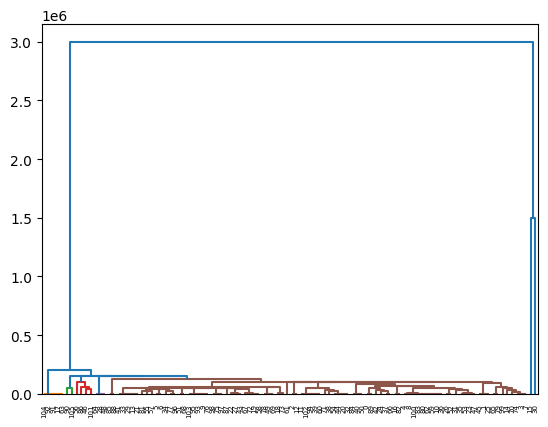

In [53]:
linkage_vis = hierarchy.linkage(X, method="single")
hierarchy.dendrogram(linkage_vis, color_threshold=150000)
plt.show()

In [55]:
threshold = 150000
linkage = hierarchy.linkage(X, method="single")
clusters = hierarchy.fcluster(linkage, threshold, criterion="distance")
px.scatter(dfcity,y='xpoint',x='City_name_index',color=clusters)

In [57]:
X1=np.array(df_da.mean_sal)
X=np.array(df_da.mean_sal).reshape((-1,1))
k_means = KMeans(n_clusters=5, random_state=0)
k_means.fit(X)
y_pred = k_means.predict(X)
y_val=[0]*(X1.shape[0])
dfone=pd.DataFrame({"xpoint":X1,"Y_value":y_val,"y_pred":y_pred})
px.scatter(dfone,x='xpoint',y='Y_value',color='y_pred')

In [59]:
cities=list(df_da.job_location)
city_value=list(df_da.job_location.unique())
city_name_index=[]
for city in df_cluster.job_location:
    for ind,value in enumerate(city_value):
        if value==city:
            city_name_index.append(ind+1)
dfcity=pd.DataFrame({"xpoint":X1,"City_name_index":cities,"y_pred":y_pred})
px.scatter(dfcity,y='xpoint',x='City_name_index',color='y_pred')

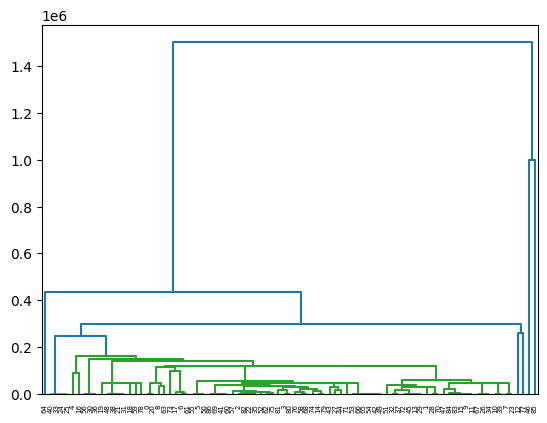

In [61]:
linkage_vis = hierarchy.linkage(X, method="single")
hierarchy.dendrogram(linkage_vis, color_threshold=250000)
plt.show()

In [63]:
threshold = 250000
linkage = hierarchy.linkage(X, method="single")
clusters = hierarchy.fcluster(linkage, threshold, criterion="distance")
px.scatter(dfcity,y='xpoint',x='City_name_index',color=clusters)

In [65]:
X1=np.array(df_ds.mean_sal)
X=np.array(df_ds.mean_sal).reshape((-1,1))
k_means = KMeans(n_clusters=5, random_state=0)
k_means.fit(X)
y_pred = k_means.predict(X)
y_val=[0]*(X1.shape[0])
dfone=pd.DataFrame({"xpoint":X1,"Y_value":y_val,"y_pred":y_pred})
px.scatter(dfone,x='xpoint',y='Y_value',color='y_pred')

In [67]:
cities=list(df_ds.job_location)
city_value=list(df_ds.job_location.unique())
city_name_index=[]
for city in df_cluster.job_location:
    for ind,value in enumerate(city_value):
        if value==city:
            city_name_index.append(ind+1)
dfcity=pd.DataFrame({"xpoint":X1,"City_name_index":cities,"y_pred":y_pred})
px.scatter(dfcity,y='xpoint',x='City_name_index',color='y_pred')

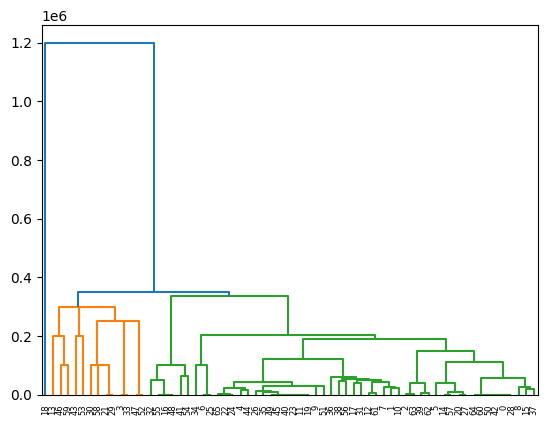

In [69]:
linkage_vis = hierarchy.linkage(X, method="single")
hierarchy.dendrogram(linkage_vis, color_threshold=340000)
plt.show()

In [71]:
threshold = 340000
linkage = hierarchy.linkage(X, method="single")
clusters = hierarchy.fcluster(linkage, threshold, criterion="distance")
px.scatter(dfcity,y='xpoint',x='City_name_index',color=clusters)

In [73]:
X1=np.array(df_mle.mean_sal)
X=np.array(df_mle.mean_sal).reshape((-1,1))
k_means = KMeans(n_clusters=5, random_state=0)
k_means.fit(X)
y_pred = k_means.predict(X)
y_val=[0]*(X1.shape[0])
dfone=pd.DataFrame({"xpoint":X1,"Y_value":y_val,"y_pred":y_pred})
px.scatter(dfone,x='xpoint',y='Y_value',color='y_pred')

In [75]:
cities=list(df_mle.job_location)
city_value=list(df_mle.job_location.unique())
city_name_index=[]
for city in df_cluster.job_location:
    for ind,value in enumerate(city_value):
        if value==city:
            city_name_index.append(ind+1)
dfcity=pd.DataFrame({"xpoint":X1,"City_name_index":cities,"y_pred":y_pred})
px.scatter(dfcity,y='xpoint',x='City_name_index',color='y_pred')

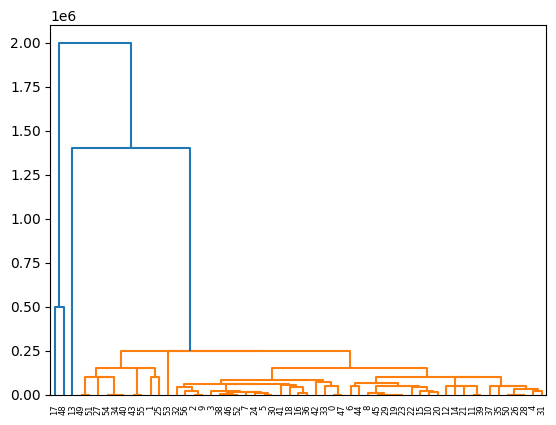

In [77]:
linkage_vis = hierarchy.linkage(X, method="single")
hierarchy.dendrogram(linkage_vis, color_threshold=500000)
plt.show()

In [79]:
threshold = 500000
linkage = hierarchy.linkage(X, method="single")
clusters = hierarchy.fcluster(linkage, threshold, criterion="distance")
px.scatter(dfcity,y='xpoint',x='City_name_index',color=clusters)

In [81]:
X1=np.array(df_cluster.mean_sal)
X=np.array(df_cluster.mean_sal).reshape((-1,1))
k_means = KMeans(n_clusters=5, random_state=0)
k_means.fit(X)
y_pred = k_means.predict(X)
y_val=[0]*(X1.shape[0])
dfone=pd.DataFrame({"xpoint":X1,"Y_value":y_val,"y_pred":y_pred})
px.scatter(dfone,x='xpoint',y='Y_value',color='y_pred')

In [83]:
cities=list(df_cluster.job_location)
city_value=list(df_cluster.job_location.unique())
city_name_index=[]
for city in df_cluster.job_location:
    for ind,value in enumerate(city_value):
        if value==city:
            city_name_index.append(ind+1)
dfcity=pd.DataFrame({"xpoint":X1,"City_name_index":cities,"y_pred":y_pred})
px.scatter(dfcity,y='xpoint',x='City_name_index',color='y_pred')

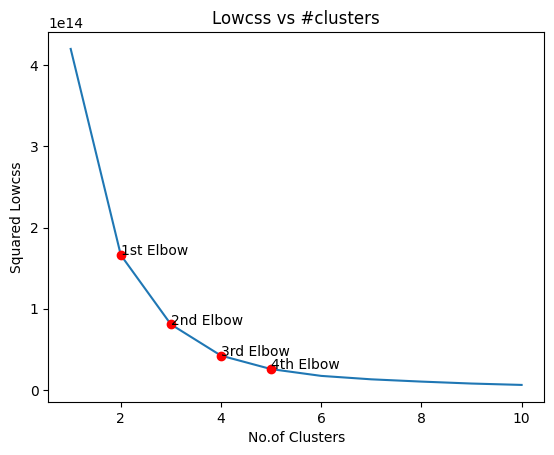

In [85]:
wcss = [] 
for i in range(1, 11): 
    k_means = KMeans(n_clusters=i, random_state=0)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

plt.plot(range(1, 11), wcss)
# highlight elbow points
plt.plot(2, wcss[1], "ro")
plt.text(2, wcss[1], "1st Elbow")
plt.plot(3, wcss[2], "ro")
plt.text(3, wcss[2], "2nd Elbow")
plt.plot(4, wcss[3], "ro")
plt.text(4, wcss[3], "3rd Elbow")
plt.plot(5, wcss[4], "ro")
plt.text(5, wcss[4], "4th Elbow")

plt.title("Lowcss vs #clusters")
plt.xlabel("No.of Clusters")
plt.ylabel("Squared Lowcss")

plt.show()

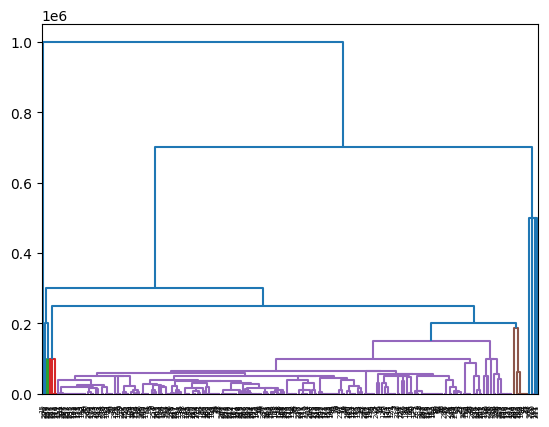

In [87]:
linkage_vis = hierarchy.linkage(X, method="single")
hierarchy.dendrogram(linkage_vis, color_threshold=200000)
plt.show()


In [89]:
threshold = 200000
linkage = hierarchy.linkage(X, method="single")
clusters = hierarchy.fcluster(linkage, threshold, criterion="distance")
px.scatter(dfcity,y='xpoint',x='City_name_index',color=clusters)

##### Answers:- 
- Yes. The highest mean salary in Banglore is 4.2M Rs while it is 2.7M Rs in Hyderabd.
- As an ML Engineer, either Bengluru or remote job should be preferred because of high salary & more job opportunities  